### import libraries

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### get data

In [76]:
csv_path = 'C:\\Users\\jlfen\\OneDrive\\Documentos\\JoaoKasten\\005_applied_projects\\project.censo-dataviz\\src\\data\\census_data.csv'
df = pd.read_csv(csv_path)

## 1. Analysis of Brazilian Demographic Growth 🌎

> ### _Abstract_
> Nesse estudo calculo a taxa de crescimento demográfico do Brasil e por Estado, além de identificar as cidades e estados com os maiores crescimentos, além da exibição gráfica dos valores calculados.

* Calcule a taxa de crescimento anual para o Brasil inteiro e para cada estado.
* Identifique as cidades com maior e menor crescimento em cada período censitário.
* Visualize o crescimento populacional em um gráfico de linhas ou barras.

In [77]:
pop_1991 = df[df['year'] == 1991]['population'].sum()
pop_2000 = df[df['year'] == 2000]['population'].sum()
pop_2010 = df[df['year'] == 2010]['population'].sum()
pop_2022 = df[df['year'] == 2022]['population'].sum()

## Annual Demographic Growth Rate (∆D)
The general formula to calculate ∆D is:

\begin{equation}
∆D = \left( \frac{P_{\text{final}}}{P_{\text{inicial}}} \right)^{\frac{1}{n}} - 1
\end{equation}
Where:

* P final: population at the end of the period
* P initial: population at the beginning of the period
* n: number of years between the beginning and the end of the period.

### National Demographic Growth Rate (_∆DN_)

The demographic growth rate from the 2022 Census confirms the hypothesis that Brazil is growing increasingly slower, with an average of 0.51% per annum over the last 30 years.

In [78]:
def tca(p_initial, p_final, n):
    return (p_final/p_initial)**(1/n) - 1

# Calculando a TCA para os diferentes períodos
tca_1991_2000 = tca(pop_1991, pop_2000, 2000-1991)
tca_2000_2010 = tca(pop_2000, pop_2010, 2010-2000)
tca_2010_2022 = tca(pop_2010, pop_2022, 2022-2010)

# Calculando a TCA para o período completo
tca_1991_2022 = tca(pop_1991, pop_2022, 2022-1991)

# Mostrando as equações
print(f"TCA (1991-2000) = {tca_1991_2000*100:.2f}% ao ano")
print(f"TCA (2000-2010) = {tca_2000_2010*100:.2f}% ao ano")
print(f"TCA (2010-2022) = {tca_2010_2022*100:.2f}% ao ano")

# Calculando a TCA para o período completo
print('Entre 1991 e 2022:')
print(f"TCA (1991-2022) = {tca_1991_2022*100:.2f}% ao ano")

TCA (1991-2000) = 1.64% ao ano
TCA (2000-2010) = 1.17% ao ano
TCA (2010-2022) = 0.51% ao ano
Entre 1991 e 2022:
TCA (1991-2022) = 1.05% ao ano


### Criar tabela com os dados calculados

Para criar a tabela da requisição para o SIDRA:
1. Atribuímos a _data_ como um dicionário, e então usamos a biblioteca _pandas_ para transformar _data_ em uma _DataFrame_ para inciarmos as análises.

In [115]:
data = {
    'year': [1991, 2000, 2010, 2022],
    'population': [pop_1991, pop_2000, pop_2010, pop_2022],
    'agr': [np.nan, tca_1991_2000, tca_2000_2010, tca_2010_2022]  # Changed 'tca' to 'agr' for Annual Growth Rate
}

brazil_population_df = pd.DataFrame(data)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
brazil_population_df['population'] = brazil_population_df['population'].astype(int)
print(brazil_population_df)

   year  population     agr
0  1991   146186030     NaN
1  2000   169252872 0.01641
2  2010   190073788 0.01167
3  2022   202066275 0.00511


### O que dizem os dados?

* TCA (1991-2000) = 1.64% a.a.
* TCA (2000-2010) = 1.17% a.a.
* TCA (2010-2022) = 0.51% a.a.
* TCA (1991-2022) = 1.05% a.a.

A análise da Taxa de Crescimento Populacional ao longo dos anos revela uma clara tendência de desaceleração no Brasil. No período entre os censos de 1991 e 2000, a taxa estava em 1.64% ao ano. No entanto, ela caiu para 1.17% ao ano entre 2000 e 2010, e mais drasticamente para 0.51% ao ano entre 2010 e 2022. Esta última taxa é até mesmo menor do que a média geral do período entre 1991 e 2022, que é de 1.05% ao ano.

**Essa tendência sugere um envelhecimento da população brasileira. Não é um fenômeno isolado; muitos países ao redor do mundo estão experienciando uma desaceleração similar em seu crescimento populacional [1].**

Causas possíveis?

Com a melhora da infraestrutura, já havia inciado uma redução de filhos por mães, 



### Population Growth Since 1991

C:\Users\jlfen\AppData\Local\Temp\ipykernel_2568\2831352401.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


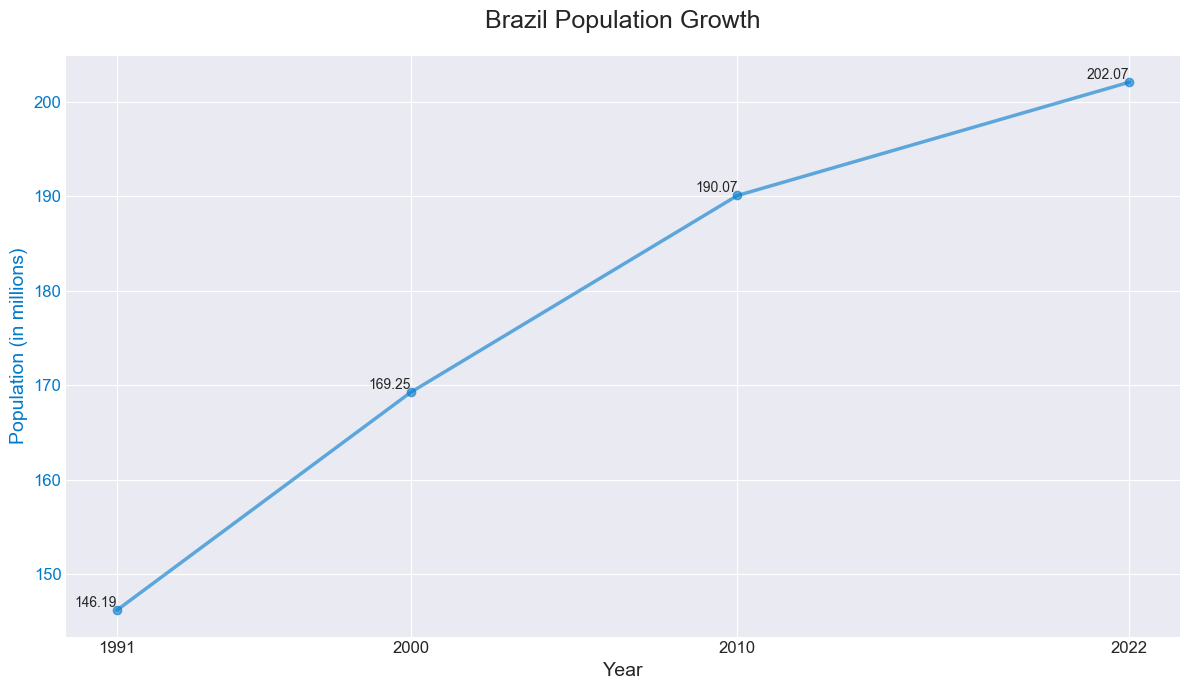

In [80]:
# Population to Millions of inhabitants
brazil_population_df['population_millions'] = brazil_population_df['population'] / 1e6

# Graph style
plt.style.use('seaborn-darkgrid')

# Graph creation
fig, ax1 = plt.subplots(figsize=(12,7))

# Main graph for the population
line1, = ax1.plot('year', 'population_millions', data=brazil_population_df, marker='o', color='#007acc', label='Population', alpha=0.6, linewidth=2.5)
ax1.set_title('Brazil Population Growth', fontsize=18, pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Population (in millions)', color='#007acc', fontsize=14)
ax1.tick_params('y', colors='#007acc', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_xticks(brazil_population_df['year'].values)  # Set the census years on the X axis

# Labels on the line points
for i, txt in enumerate(brazil_population_df['population_millions']):
    ax1.text(brazil_population_df['year'].iloc[i], brazil_population_df['population_millions'].iloc[i], f'{txt:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Display the graph
plt.tight_layout()
plt.show()


### Pivot Table | Population by City

In [116]:
# Creating the pivot table
city_population_pivot = df.pivot_table(index=['state', 'city'], columns='year', values='population').reset_index()
city_population_pivot.columns.name = None  # Remove the column index name

# Function to convert values to integers, except NaN
def convert_to_int(val):
    return int(val) if not pd.isna(val) else val

# Applying the conversion only to the population columns
cols_to_convert = [1991, 2000, 2010, 2022]
city_population_pivot[cols_to_convert] = city_population_pivot[cols_to_convert].applymap(convert_to_int)

# Display the adjusted DataFrame
pd.options.display.float_format = '{:,.0f}'.format
print(city_population_pivot)

     state          city   1991   2000   2010   2022
0       AC    Acrelândia    NaN  7,929 12,538  13978
1       AC  Assis Brasil  2,914  3,490  6,023   8090
2       AC     Brasiléia 20,125 16,991 21,383  25931
3       AC        Bujari    NaN  5,826  8,459  12917
4       AC      Capixaba    NaN  5,206  8,796  10370
...    ...           ...    ...    ...    ...    ...
5565    TO    Tocantínia  6,342  5,621  6,730   7439
5566    TO      Tupirama    NaN  1,179  1,574   1909
5567    TO    Tupiratins    NaN  1,364  2,097   1865
5568    TO  Wanderlândia  9,243 10,259 10,966  10506
5569    TO       Xambioá 11,686 12,124 11,476  10503

[5570 rows x 6 columns]


### Pivot Table | Population by State

In [82]:
state_population_pivot = df.pivot_table(index=['state'], columns='year', values='population', aggfunc='sum').reset_index()
state_population_pivot.columns.name = None
print(state_population_pivot)

   state       1991       2000       2010       2022
0     AC    416,449    556,475    730,903    824,456
1     AL  2,507,990  2,818,628  3,114,195  3,117,174
2     AM  2,097,178  2,806,332  3,476,658  3,928,931
3     AP    288,463    475,522    667,234    729,102
4     BA 11,841,182 13,044,502 13,992,202 14,097,991
5     CE  6,357,237  7,420,084  8,439,947  8,768,228
6     DF  1,593,455  2,044,211  2,558,865  2,792,551
7     ES  2,593,882  3,090,737  3,501,693  3,807,835
8     GO  4,002,031  4,988,946  5,985,111  7,021,254
9     MA  4,923,102  5,646,116  6,568,693  6,759,185
10    MG 15,676,612 17,834,022 19,519,023 20,435,265
11    MS  1,770,546  2,068,831  2,437,037  2,736,741
12    MT  2,012,351  2,484,096  3,020,113  3,636,603
13    PA  4,929,405  6,182,021  7,566,369  8,084,091
14    PB  3,195,435  3,438,084  3,758,323  3,959,395
15    PE  7,112,485  7,900,044  8,770,723  9,017,554
16    PI  2,578,177  2,840,041  3,114,735  3,261,288
17    PR  8,413,671  9,532,043 10,406,307 11,3

## Graph | Population Growth by State (log scale)

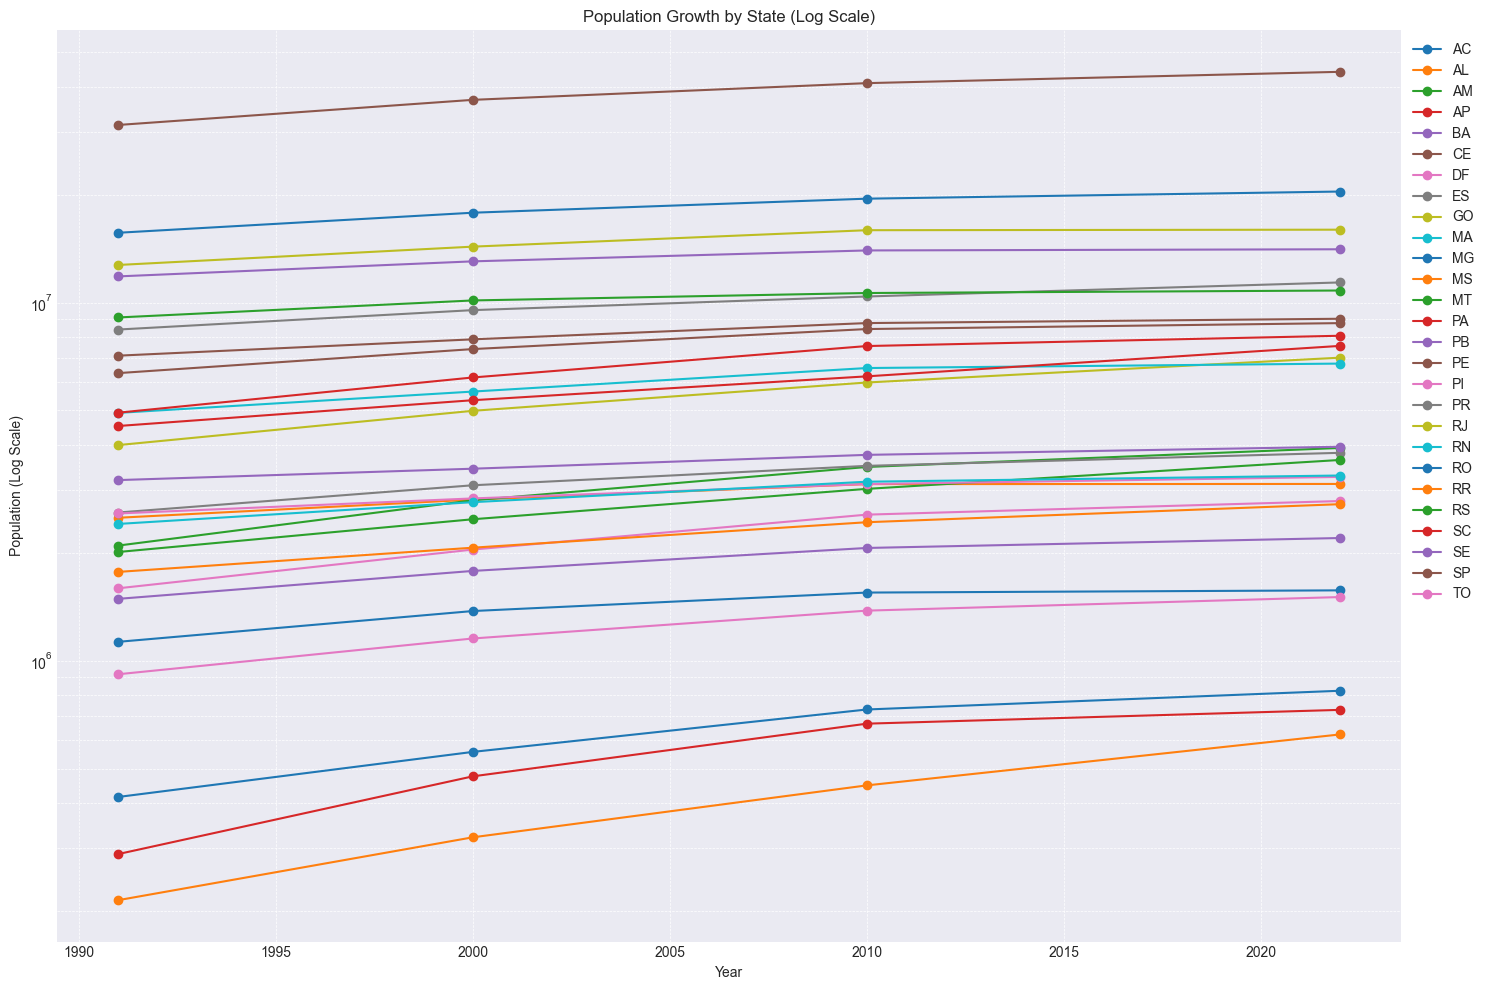

In [129]:
import matplotlib.pyplot as plt

# Define the list of years
years = [1991, 2000, 2010, 2022]

plt.figure(figsize=(15, 10))

# Iterate over each state and plot on the graph
for index, row in state_population_pivot.iterrows():
    plt.plot(years, row[years].values, label=index, marker='o')

plt.yscale('log')  # Set the Y-axis scale to logarithmic
plt.title('Population Growth by State (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Population (Log Scale)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [128]:
# Setting the 'state' column as the index
state_population_pivot.set_index('state', inplace=True)

# Calculating the Annual Demographic Growth Rate (ADGR) for each interval and storing in the adgrs dictionary
intervals = [(1991, 2000), (2000, 2010), (2010, 2022)]
adgrs = {}

for start, end in intervals:
    n = end - start
    adgr = ((state_population_pivot[end] / state_population_pivot[start]) ** (1/n)) - 1
    adgrs[f"ADGR {start}-{end}"] = adgr

# Creating DataFrame from the adgrs dictionary
adgr_df = pd.DataFrame(adgrs)

# Adjusting the format to display the actual ADGR values
pd.options.display.float_format = '{:,.5f}'.format

print(adgr_df)


KeyError: "None of ['state'] are in the columns"

In [135]:
# Check if 'state' is a column in the DataFrame
if 'state' in state_population_pivot.columns:
    # Setting the 'state' column as the index
    state_population_pivot.set_index('state', inplace=True)

# Calculating the Annual Demographic Growth Rate (ADGR) for each interval and storing in the adgrs dictionary
intervals = [(1991, 2000), (2000, 2010), (2010, 2022)]
adgrs = {}

for start, end in intervals:
    n = end - start
    adgr = ((state_population_pivot[end] / state_population_pivot[start]) ** (1/n)) - 1
    adgrs[f"ADGR {start}-{end}"] = adgr

# Creating DataFrame from the adgrs dictionary
adgr_df = pd.DataFrame(adgrs)

# Adjusting the format to display the actual ADGR values
pd.options.display.float_format = '{:,.5f}'.format

print(adgr_df)

       ADGR 1991-2000  ADGR 2000-2010  ADGR 2010-2022
state                                                
AC            0.03273         0.02764         0.01009
AL            0.01306         0.01002         0.00008
AM            0.03289         0.02165         0.01024
AP            0.05711         0.03445         0.00742
BA            0.01081         0.00704         0.00063
CE            0.01733         0.01296         0.00318
DF            0.02807         0.02271         0.00731
ES            0.01966         0.01256         0.00701
GO            0.02479         0.01837         0.01339
MA            0.01534         0.01525         0.00239
MG            0.01443         0.00907         0.00383
MS            0.01745         0.01651         0.00971
MT            0.02368         0.01973         0.01560
PA            0.02548         0.02041         0.00553
PB            0.00817         0.00895         0.00435
PE            0.01174         0.01051         0.00232
PI            0.01081       

### Growth heatmap by state

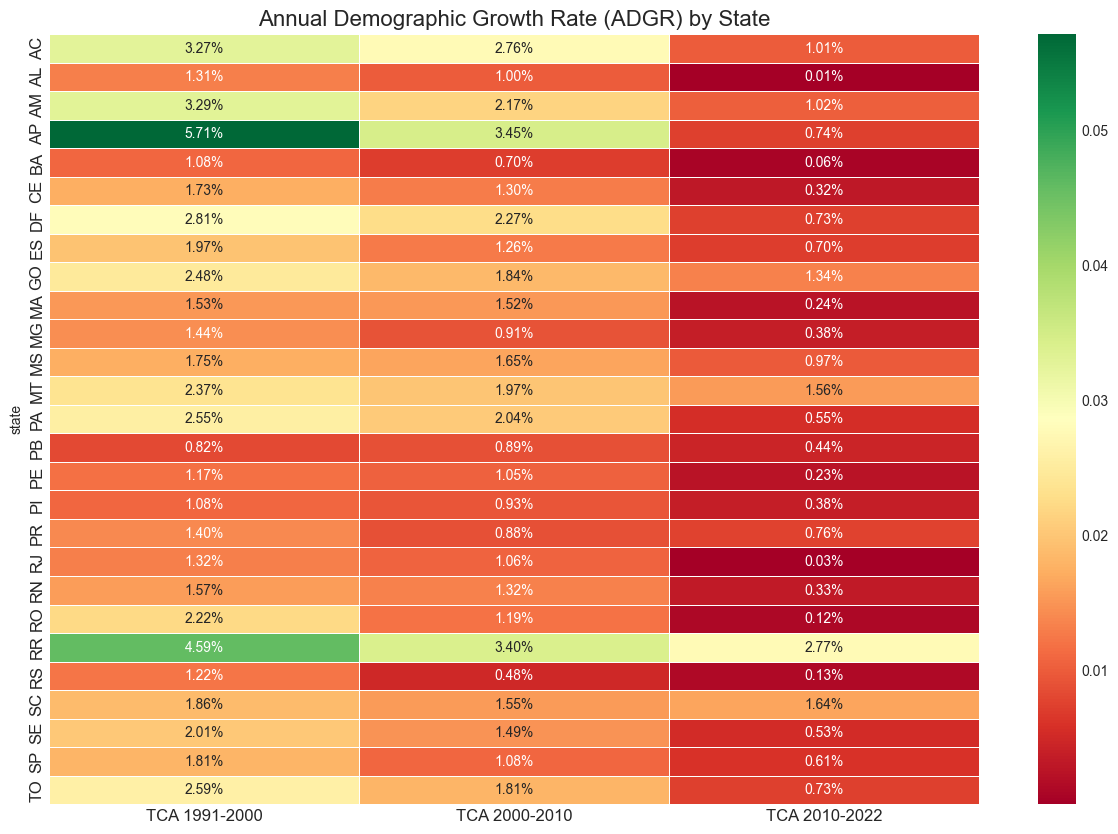

In [137]:
plt.figure(figsize=(15, 10))  # Increase the size of the figure

ax = sns.heatmap(tca_df, annot=True, cmap='RdYlGn', fmt=".2%", linewidths=.5)

plt.title("Annual Demographic Growth Rate (ADGR) by State", fontsize=16)

# Adjust the font size of the labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()

## By Region:
add dictionary of region by states

In [138]:
# Dictionary mapping each state to its respective region
state_to_region = {
    'AC': 'North',
    'AL': 'Northeast',
    'AM': 'North',
    'AP': 'North',
    'BA': 'Northeast',
    'CE': 'Northeast',
    'DF': 'Central-West',
    'ES': 'Southeast',
    'GO': 'Central-West',
    'MA': 'Northeast',
    'MG': 'Southeast',
    'MS': 'Central-West',
    'MT': 'Central-West',
    'PA': 'North',
    'PB': 'Northeast',
    'PE': 'Northeast',
    'PI': 'Northeast',
    'PR': 'South',
    'RJ': 'Southeast',
    'RN': 'Northeast',
    'RO': 'North',
    'RR': 'North',
    'RS': 'South',
    'SC': 'South',
    'SE': 'Northeast',
    'SP': 'Southeast',
    'TO': 'North'
}

# Testing the mapping for the first state
state_to_region["SP"]  # Should return "Southeast"

'Southeast'

## Calculation of ADGR by region.

In [141]:
# Adding the 'region' column using the mapping
state_population_pivot['region'] = state_population_pivot.index.map(state_to_region)

# Grouping by region and summing the populations
region_population_pivot = state_population_pivot.groupby('region').sum()

# Calculating ADGR for each interval and storing in the adgrs_region dictionary
intervals = [(1991, 2000), (2000, 2010), (2010, 2022)]
adgrs_region = {}

for start, end in intervals:
    n = end - start
    adgr = ((region_population_pivot[end] / region_population_pivot[start]) ** (1/n)) - 1
    adgrs_region[f"{start}-{end}"] = adgr

# Creating DataFrame from the adgrs_region dictionary
adgr_region_df = pd.DataFrame(adgrs_region)

# Displaying the DataFrame
print('ADGR by Region')
print(adgr_region_df)

ADGR by Region
              1991-2000  2000-2010  2010-2022
region                                       
Central-West    0.02377    0.01911    0.01216
North           0.02854    0.02084    0.00732
Northeast       0.01304    0.01065    0.00231
South           0.01422    0.00867    0.00734
Southeast       0.01626    0.01042    0.00444


## Growth heatmap by region

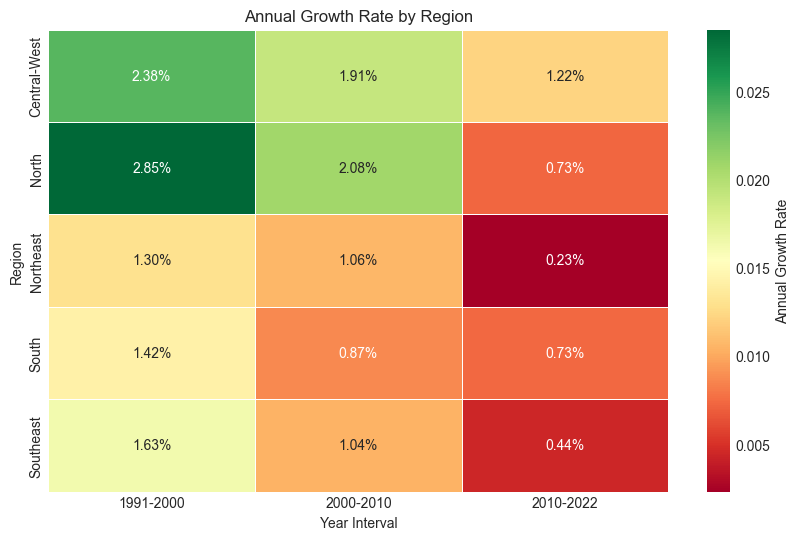

In [142]:
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the heatmap
sns.heatmap(adgr_region_df, annot=True, cmap="RdYlGn", fmt=".2%", linewidths=.5, cbar_kws={'label': 'Annual Growth Rate'})

# Setting the title and labels
plt.title("Annual Growth Rate by Region")
plt.xlabel("Year Interval")
plt.ylabel("Region")

plt.show()

In [148]:
# Calculating the ADGR from 2010 to 2022 for each city
city_population_pivot['ADGR 2010-2022'] = ((city_population_pivot[2022] / city_population_pivot[2010]) ** (1/12)) - 1

# Finding the fastest growing city
fastest_growing_city = city_population_pivot[['city', 'ADGR 2010-2022']].sort_values(by='ADGR 2010-2022', ascending=False).iloc[0]

# Finding the largest city in 2022
largest_city = city_population_pivot[['city', 2022]].sort_values(by=2022, ascending=False).iloc[0]

# Finding the slowest growing city (or the one that decreased the most)
slowest_growing_city = city_population_pivot[['city', 'ADGR 2010-2022']].sort_values(by='ADGR 2010-2022').iloc[0]

# Finding the smallest city in 2022
smallest_city = city_population_pivot[['city', 2022]].sort_values(by=2022).iloc[0]

# Fetching the state name of the cities using the original dataframe
fastest_growing_city_state = df[df['city'] == fastest_growing_city['city']]['state'].iloc[0]
largest_city_state = df[df['city'] == largest_city['city']]['state'].iloc[0]
slowest_growing_city_state = df[df['city'] == slowest_growing_city['city']]['state'].iloc[0]
smallest_city_state = df[df['city'] == smallest_city['city']]['state'].iloc[0]

# Formatting the output with states
output_with_states_final = (
    f"City that grew the most between 2010-2022: {fastest_growing_city['city']} - {fastest_growing_city_state} with ADGR of {fastest_growing_city['ADGR 2010-2022']*100:.2f}%.\n"
    f"Largest city in 2022: {largest_city['city']} - {largest_city_state} with a population of {int(largest_city[2022]):,} inhabitants.\n"
    f"City that grew the least (or decreased the most) between 2010-2022: {slowest_growing_city['city']} - {slowest_growing_city_state} with ADGR of {slowest_growing_city['ADGR 2010-2022']*100:.2f}%.\n"
    f"Smallest city in 2022: {smallest_city['city']} - {smallest_city_state} with a population of {int(smallest_city[2022]):,} inhabitants."
)

print(output_with_states_final)

City that grew the most between 2010-2022: Canaã dos Carajás - PA with ADGR of 9.22%.
Largest city in 2022: São Paulo - SP with a population of 11,394,443 inhabitants.
City that grew the least (or decreased the most) between 2010-2022: Caatiba - BA with ADGR of -4.97%.
Smallest city in 2022: Serra da Saudade - MG with a population of 829 inhabitants.


### Reference
